# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import os

os.environ["KERAS_BACKEND"] = "torch"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import keras
from models.analytical import SingleOccupationSingleIsotope, MultiOccupationMultiIsotope
from models.cpu import CPUSequential, CPUFunctional
from evaluation import load_search
from evaluation import plot_df as plot
import matplotlib.pyplot as plt
from evaluation import performance_batch_size_plot
from models.gpu.layers import ConcentrationRatios, IsotopeNormalizer

plt.style.use("latex.mplstyle")
import torch

torch.cuda.is_available()

False

# Batch size performance

  0%|          | 0/99 [00:00<?, ?it/s]

Saved figure to report/figures/performance_batch_size_plot.pdf


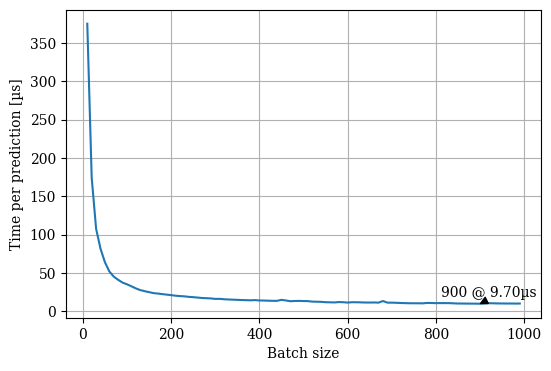

In [4]:
model = keras.models.load_model(
    "trained_models/test_model.keras",
    compile=False,
    custom_objects={"ConcentrationRatios": ConcentrationRatios},
)
performance_batch_size_plot(model, save=True, exclude_title=True)

# Random Search Analysis

## SOSI fixed, first run

In [3]:
df = load_search("random_search/SOSI fixed physics, 100")

In [ ]:
df.columns

Index(['num_layers', 'layer_size_0', 'activation_0', 'output_activation',
       'physics_weight', 'learning_rate', 'layer_size_1', 'activation_1',
       'layer_size_2', 'activation_2', 'layer_size_3', 'activation_3',
       'layer_size_4', 'activation_4', 'shuffle', 'batch_size', 'loss', 'maml',
       'max_ae', 'mean_absolute_error', 'val_loss', 'val_maml', 'val_max_ae',
       'val_mean_absolute_error', 'cpu_time', 'param_count'],
      dtype='object')

Saved figure to report/figures/search/physics_weight_max_ae_output_activation.pdf


<Figure size 613.899x400 with 0 Axes>

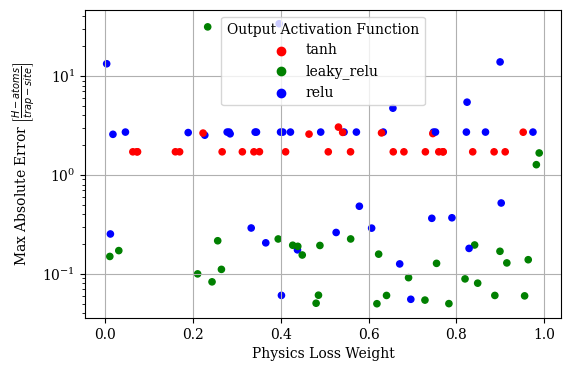

In [13]:
plot(
    df,
    x="physics_weight",
    y="max_ae",
    c="output_activation",
    xlabel="Physics Loss Weight",
    ylabel="Max Absolute Error $\\left[\\frac{H-atoms}{trap-site}\\right]$",
    clabel="Output Activation Function",
    logy=True,
    save=True,
)

Saved figure to report/figures/search/physics_weight_maml_mean_absolute_error.pdf


<Figure size 613.899x400 with 0 Axes>

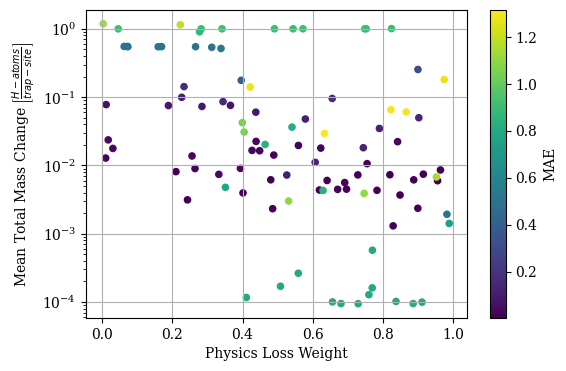

In [27]:
plot(
    df,
    x="physics_weight",
    y="maml",
    c="mean_absolute_error",
    ylabel=r"Mean Total Mass Change $\left[\frac{H-atoms}{trap-site}\right]$",
    xlabel="Physics Loss Weight",
    clabel="MAE",
    logy=True,
    save=True,
)

<Figure size 613.899x400 with 0 Axes>

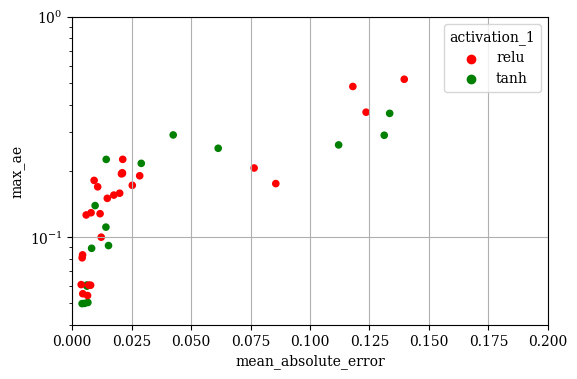

In [ ]:
plot(
    df,
    x="mean_absolute_error",
    y="max_ae",
    c="activation_1",
    logy=True,
    ylim=(4e-2, 1),
    xlim=(0, 0.2),
)

In [ ]:
df["batch_size"].max()

32460

<Figure size 613.899x400 with 0 Axes>

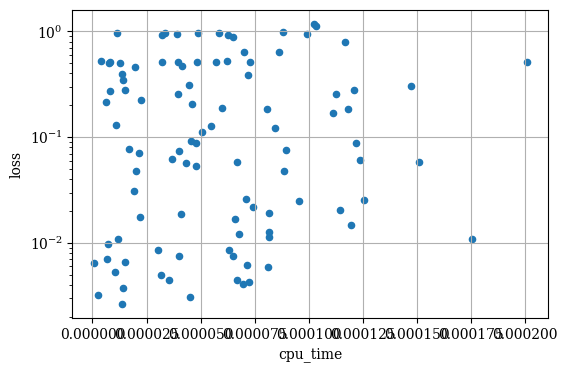

In [36]:
plot(df, "cpu_time", "loss", logy=True)

In [ ]:
## SOSI fixed, second run

In [ ]:
df = load_search("random_search/SOSI fixed physics 2")

Reloading Tuner from random_search/SOSI fixed physics 2/tuner0.json


  0%|          | 0/100 [00:00<?, ?it/s]

/home/bergerdd/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/home/bergerdd/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/home/bergerdd/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/home/bergerdd/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', 

In [ ]:
df.columns

Index(['num_layers', 'layer_size_0', 'activation_0', 'output_activation',
       'physics_weight', 'learning_rate', 'layer_size_1', 'activation_1',
       'layer_size_2', 'activation_2', 'layer_size_3', 'activation_3', 'loss',
       'maml', 'max_ae', 'mean_absolute_error', 'val_loss', 'val_maml',
       'val_max_ae', 'val_mean_absolute_error', 'cpu_time', 'param_count',
       'layer_size_4', 'activation_4'],
      dtype='object')

<Figure size 613.899x400 with 0 Axes>

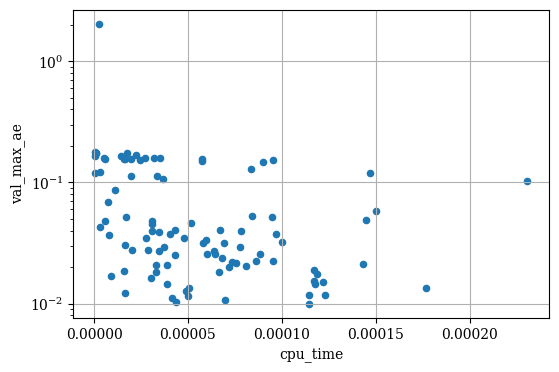

In [ ]:
plot(df, "cpu_time", "val_max_ae", logy=True)

<Figure size 613.899x400 with 0 Axes>

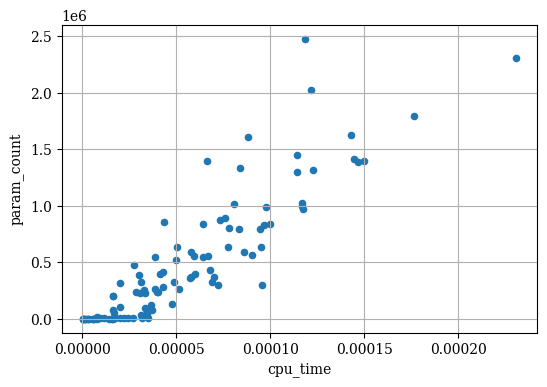

In [ ]:
plot(df, "cpu_time", "param_count")

# MIMO random

In [ ]:
df = load_search("random_search/isotope_norm_hyperband_2/", reload=True)

Reloading Tuner from random_search/isotope_norm_hyperband_2/tuner0.json


  0%|          | 0/79 [00:00<?, ?it/s]

/home/berger/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import numpy as np

df["log_lr"] = np.log10(df["learning_rate"])

/home/berger/TrapDiffusion/saveable.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(width_scale * w, height_scale * h))


<Figure size 613.899x400 with 0 Axes>

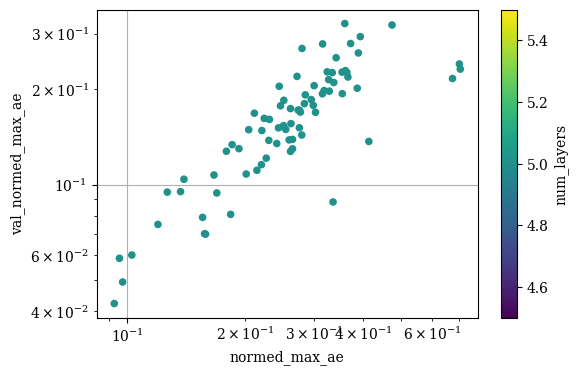

<Figure size 613.899x400 with 0 Axes>

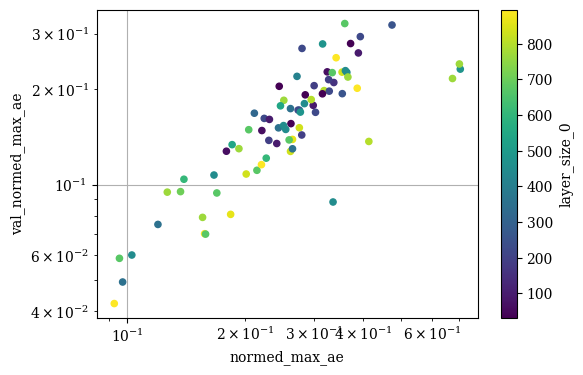

<Figure size 613.899x400 with 0 Axes>

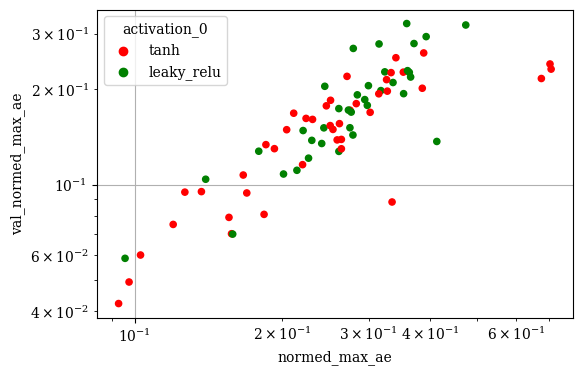

<Figure size 613.899x400 with 0 Axes>

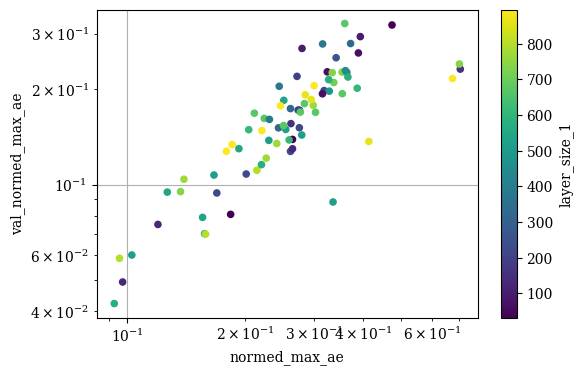

<Figure size 613.899x400 with 0 Axes>

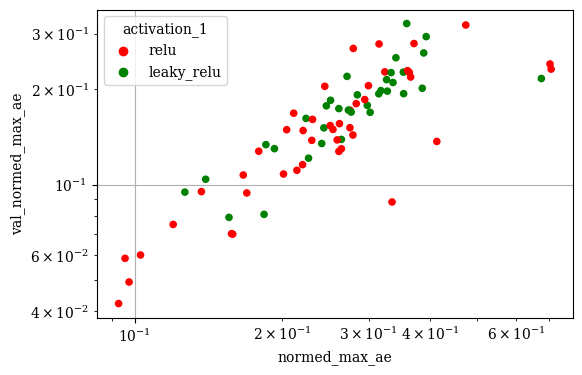

<Figure size 613.899x400 with 0 Axes>

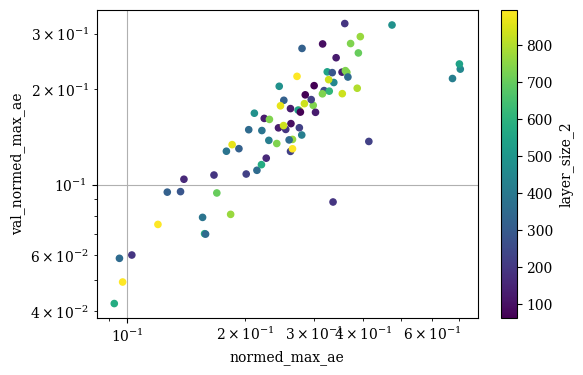

<Figure size 613.899x400 with 0 Axes>

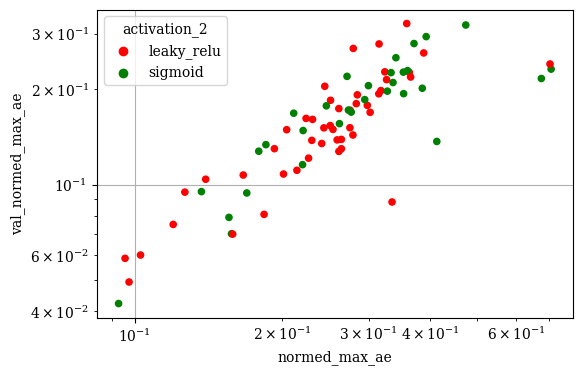

<Figure size 613.899x400 with 0 Axes>

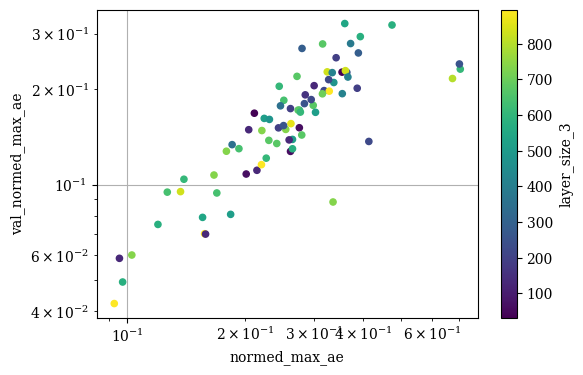

<Figure size 613.899x400 with 0 Axes>

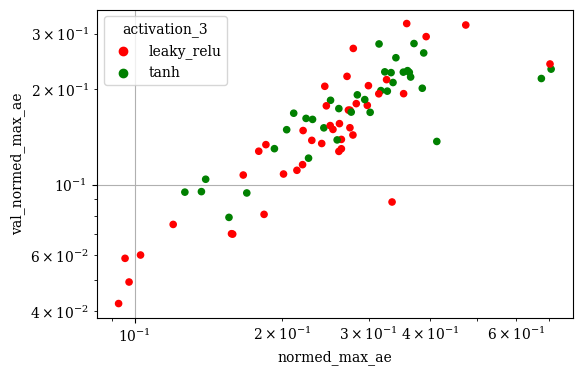

<Figure size 613.899x400 with 0 Axes>

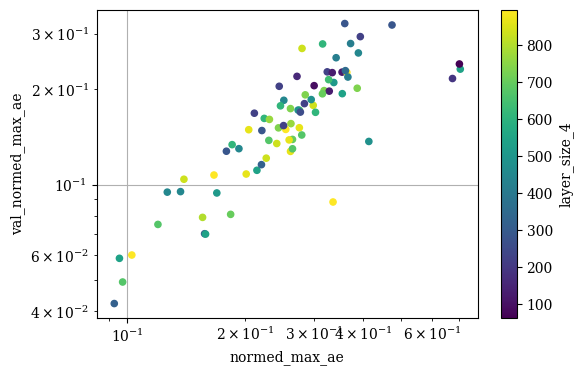

<Figure size 613.899x400 with 0 Axes>

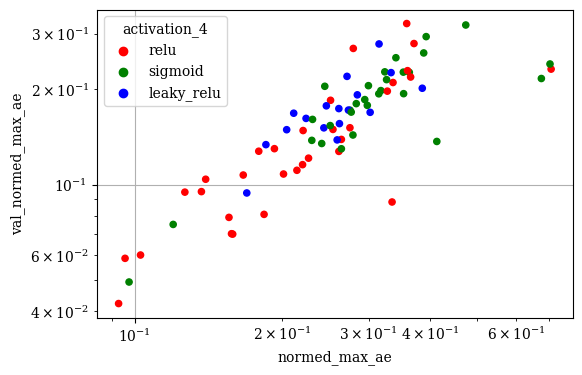

<Figure size 613.899x400 with 0 Axes>

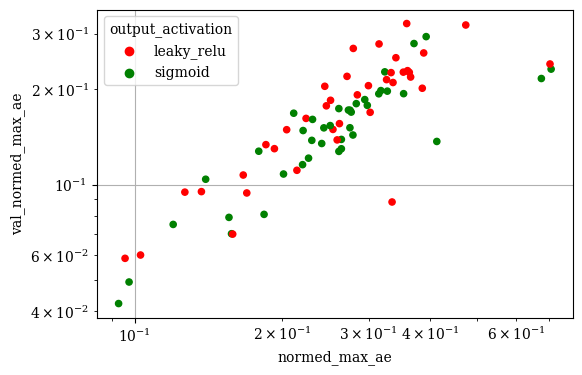

<Figure size 613.899x400 with 0 Axes>

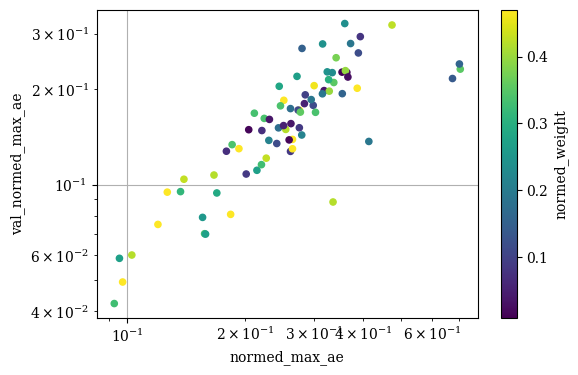

<Figure size 613.899x400 with 0 Axes>

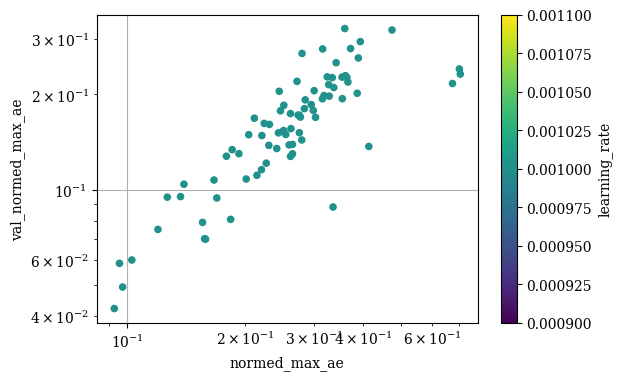

<Figure size 613.899x400 with 0 Axes>

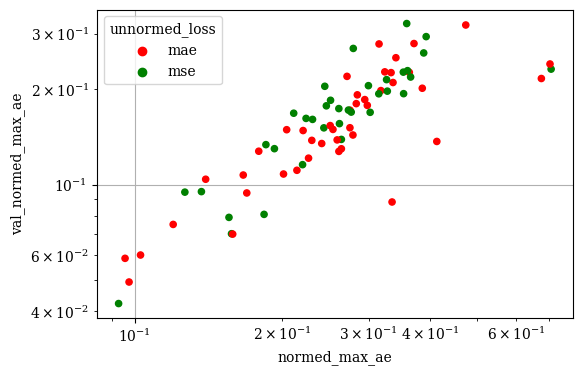

<Figure size 613.899x400 with 0 Axes>

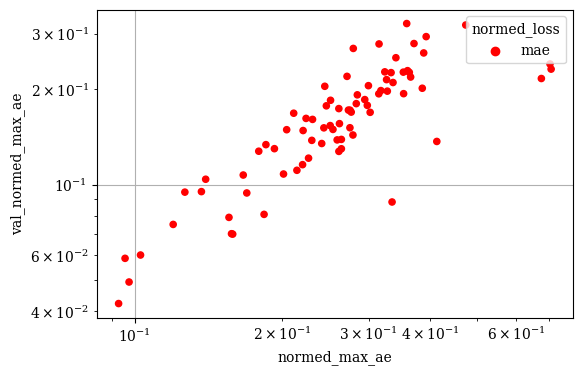

<Figure size 613.899x400 with 0 Axes>

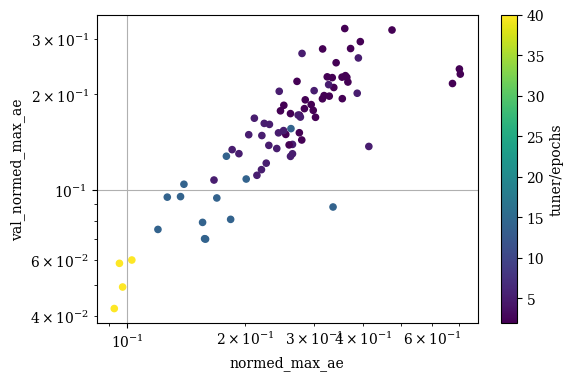

<Figure size 613.899x400 with 0 Axes>

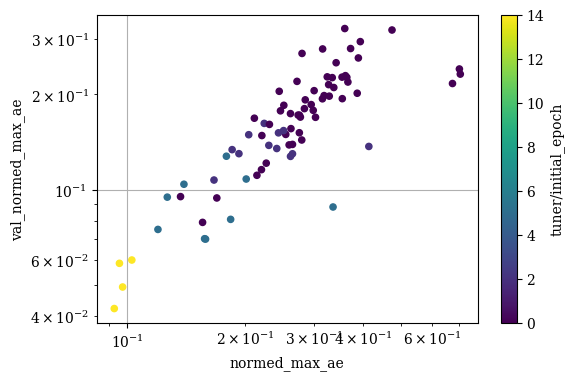

<Figure size 613.899x400 with 0 Axes>

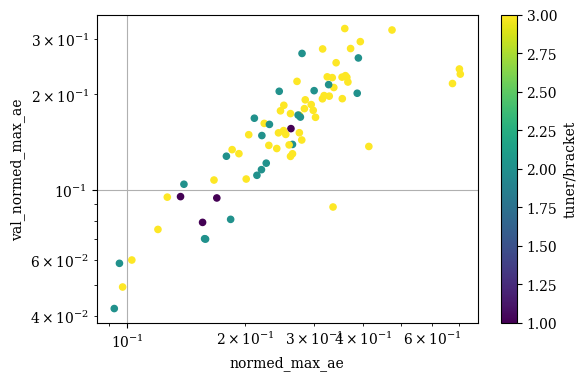

<Figure size 613.899x400 with 0 Axes>

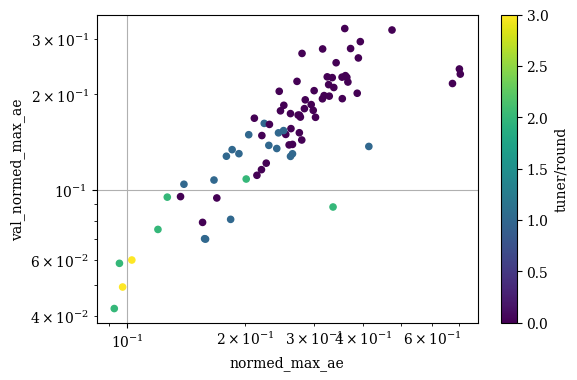

<Figure size 613.899x400 with 0 Axes>

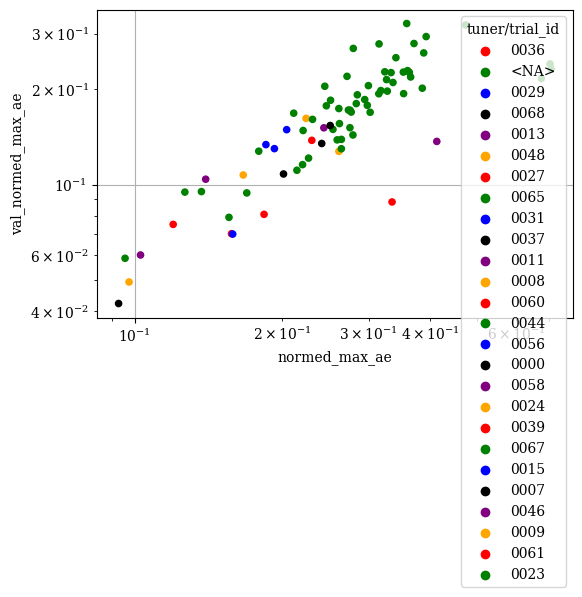

<Figure size 613.899x400 with 0 Axes>

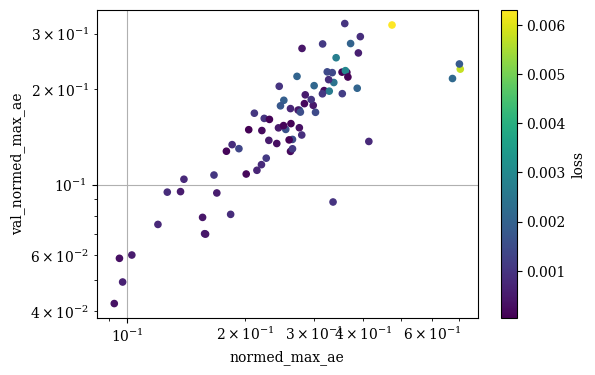

<Figure size 613.899x400 with 0 Axes>

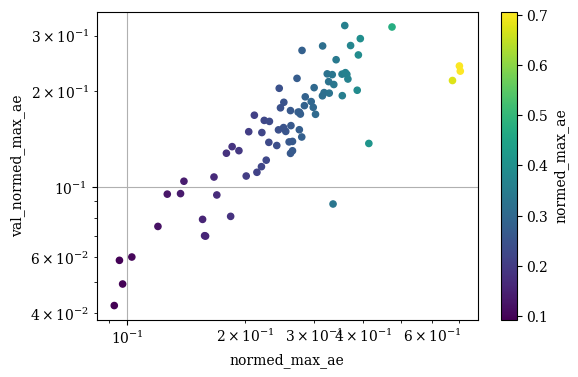

<Figure size 613.899x400 with 0 Axes>

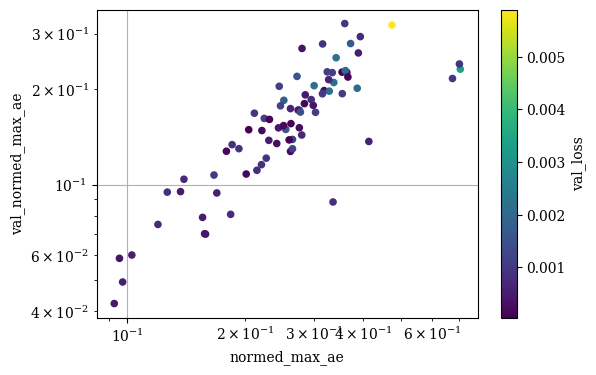

<Figure size 613.899x400 with 0 Axes>

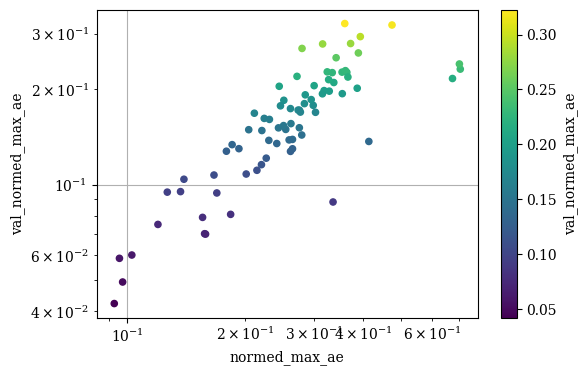

<Figure size 613.899x400 with 0 Axes>

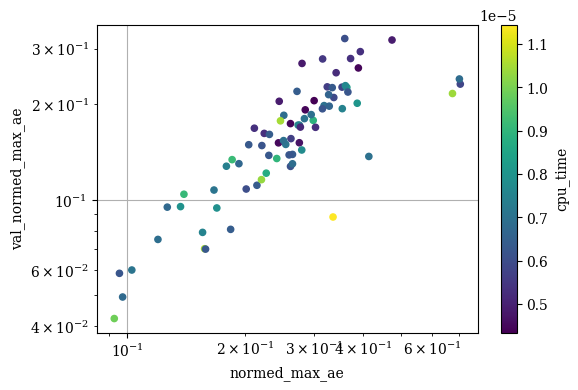

<Figure size 613.899x400 with 0 Axes>

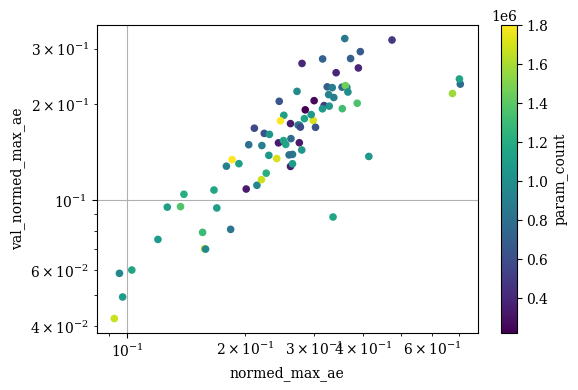

<Figure size 613.899x400 with 0 Axes>

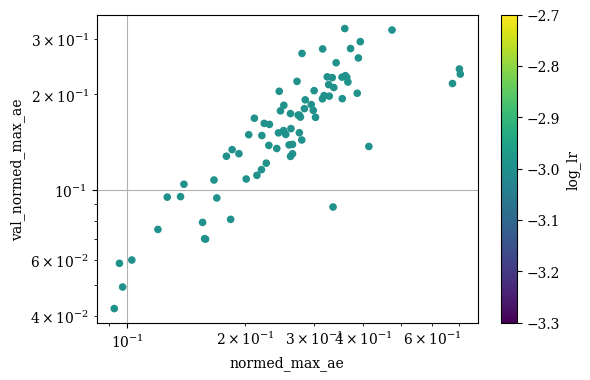

In [ ]:
for column in df.columns:
    plot(df, "normed_max_ae", "val_normed_max_ae", column, logy=True, logx=True)
plt.show()

In [ ]:
from training.datasets import load_dataset
import numpy as np

info, (train_x, train_y), _ = load_dataset(
    "Multi-Occupation, Multi Isotope, random matrix, normalized"
)

In [ ]:
names = "t, c^H, c^D, c_{00}, c_{10}, c_{01}, c_{20}, c_{11}, c_{02}, c_{30}, c_{21}, c_{12}, c_{03}, r_{10}, r_{01}, r_{20}, r_{11},r_{02}, r_{30}, r_{21}, r_{12}, r_{03}".split(
    ","
)
for i, name in enumerate(names):
    mean = np.mean(train_x[:, i])
    min = np.min(train_x[:, i])
    max = np.max(train_x[:, i])
    print(f"{name:<8}: min: {min:.3f}, max: {max:.3f}")

t       : min: 0.010, max: 1.000
 c^H    : min: 0.000, max: 0.204
 c^D    : min: 0.000, max: 0.193
 c_{00} : min: 0.000, max: 0.216
 c_{10} : min: 0.000, max: 0.210
 c_{01} : min: 0.000, max: 0.225
 c_{20} : min: 0.000, max: 0.176
 c_{11} : min: 0.000, max: 0.223
 c_{02} : min: 0.000, max: 0.172
 c_{30} : min: 0.000, max: 0.157
 c_{21} : min: 0.000, max: 0.160
 c_{12} : min: 0.000, max: 0.181
 c_{03} : min: 0.000, max: 0.165
 r_{10} : min: 0.077, max: 0.820
 r_{01} : min: 0.075, max: 0.859
 r_{20} : min: 0.090, max: 0.913
 r_{11} : min: 0.177, max: 0.954
r_{02}  : min: 0.218, max: 0.960
 r_{30} : min: 0.290, max: 0.970
 r_{21} : min: 0.328, max: 0.984
 r_{12} : min: 0.426, max: 0.994
 r_{03} : min: 0.454, max: 0.994


In [ ]:
df.sort_values("val_normed_max_ae").iloc[0]

num_layers                      5
layer_size_0                  896
activation_0                 tanh
layer_size_1                  576
activation_1                 relu
layer_size_2                  576
activation_2              sigmoid
layer_size_3                  896
activation_3           leaky_relu
layer_size_4                  320
activation_4                 relu
output_activation         sigmoid
normed_weight            0.329671
learning_rate               0.001
unnormed_loss                 mse
normed_loss                   mae
tuner/epochs                   40
tuner/initial_epoch            14
tuner/bracket                   2
tuner/round                     2
tuner/trial_id               0068
loss                     0.000344
normed_max_ae            0.092772
val_loss                 0.000416
val_normed_max_ae         0.04223
cpu_time                       -1
param_count               1677516
log_lr                       -3.0
Name: 0073, dtype: object